In [1]:
import scutquant
import numpy as np
import pandas as pd

df = pd.read_csv('D:/Desktop/pta.csv', encoding='gbk')
df.set_index(['时间'], inplace=True)

In [2]:
df = scutquant.clean(df)
df['wave'] = df['最高'] - df['最低']
df['mean'] = (df['开盘'] + df['收盘']) / 2
df['dhigh'] = df['最高'] - df['mean']
df['dlow'] = df['最低'] - df['mean']
df['amount'] = df['成交量'] * df['mean']
df['t'] = np.arange(len(df.index))
df['t2'] = df['t'] ** 2
df['d'] = abs(df['收盘'] - df['开盘'])
df['label'] = df['收盘'] / df['开盘'] 

for i in range(1, 25):  # 根据过去2小时的数据构建特征
    df['open' + str(i)] = df['开盘'].shift(i)
    df['high' + str(i)] = df['最高'].shift(i)
    df['low' + str(i)] = df['最低'].shift(i)
    df['volume' + str(i)] = df['成交量'].shift(i)
    df['dhigh' + str(i)] = df['dhigh'].shift(i)
    df['dlow' + str(i)] = df['dlow'].shift(i)
    df['wave' + str(i)] = df['wave'].shift(i)
    df['mean' + str(i)] = df['mean'].shift(i)
    df['amount' + str(i)] = df['amount'].shift(i)
    df['label' + str(i)] = df['label'].shift(i)
    df['dif' + str(i)] = df['MACD_DIF'].shift(i)
    df['dea' + str(i)] = df['MACD_DEA'].shift(i)
    df['macd' + str(i)] = df['MACD_MACD'].shift(i)

df = df.drop(
    ['dhigh', 'dlow', 'wave', 'mean', 'amount', '开盘', '收盘', '成交量', '最低', '最高', 'MACD_DIF', 'MACD_DEA', 'MACD_MACD'],
    axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 18900 entries,  2021/07/27-22:50 to  2022/09/14-15:00
Columns: 316 entries, t to macd24
dtypes: float64(313), int32(2), int64(1)
memory usage: 45.6+ MB
None
X_mis= 0.06530038175607795
clean dataset done 

pop label done 

label norm done 



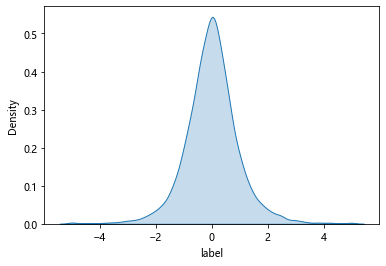

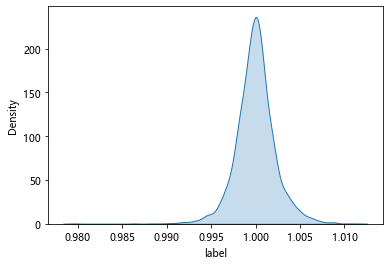

norm data done 

                 t        t2         d     open1     high1      low1  \
t         1.000000  0.968433  0.104707  0.808963  0.808679  0.809353   
t2        0.968433  1.000000  0.114690  0.895344  0.895006  0.895763   
d         0.104707  0.114690  1.000000  0.169008  0.170531  0.167611   
open1     0.808963  0.895344  0.169008  1.000000  0.999934  0.999934   
high1     0.808679  0.895006  0.170531  0.999934  1.000000  0.999914   
...            ...       ...       ...       ...       ...       ...   
amount24  0.079511  0.125956  0.163250  0.223309  0.223698  0.222641   
label24   0.003513  0.000980  0.002087  0.009615  0.009565  0.009814   
dif24     0.026741  0.010942  0.007290  0.030068  0.029963  0.029889   
dea24     0.020448  0.004914  0.005179  0.028237  0.028132  0.028082   
macd24   -0.009790 -0.003661 -0.013527 -0.001526 -0.001456 -0.001325   

           volume1    dhigh1     dlow1     wave1  ...  volume24   dhigh24  \
t        -0.055848  0.153785 -0.143680  0

In [3]:
x_train, x_test, y_train, y_test, ymean, ystd = scutquant.AutoProcessor(df, y='label', norm='r')

In [4]:
model = scutquant.hybrid()
model.fit(x_train, y_train, x_test, (y_test-ymean)/ystd)

[0]	validation_0-rmse:1.21666
[1]	validation_0-rmse:1.20544
[2]	validation_0-rmse:1.19809
[3]	validation_0-rmse:1.19120
[4]	validation_0-rmse:1.18432
[5]	validation_0-rmse:1.17725
[6]	validation_0-rmse:1.17254
[7]	validation_0-rmse:1.16765
[8]	validation_0-rmse:1.16336
[9]	validation_0-rmse:1.15890
[10]	validation_0-rmse:1.15570
[11]	validation_0-rmse:1.15143
[12]	validation_0-rmse:1.14698
[13]	validation_0-rmse:1.14389
[14]	validation_0-rmse:1.14090
[15]	validation_0-rmse:1.13838
[16]	validation_0-rmse:1.13555
[17]	validation_0-rmse:1.13288
[18]	validation_0-rmse:1.13092
[19]	validation_0-rmse:1.12853
[20]	validation_0-rmse:1.12619
[21]	validation_0-rmse:1.12509
[22]	validation_0-rmse:1.12302
[23]	validation_0-rmse:1.12161
[24]	validation_0-rmse:1.11989
[25]	validation_0-rmse:1.11890
[26]	validation_0-rmse:1.11823
[27]	validation_0-rmse:1.11707
[28]	validation_0-rmse:1.11537
[29]	validation_0-rmse:1.11475
[30]	validation_0-rmse:1.11320
[31]	validation_0-rmse:1.11207
[32]	validation_0-

In [5]:
pred = model.predict(x_test)
pred = pd.Series(pred, index=y_test.index)
pred += ymean
pred *= ystd
print('pearson_corr=', scutquant.pearson_corr(pred, y_test))

pearson_corr= 0.14163980729924194


In [6]:
model.dump('D:/Desktop')